<a href="https://colab.research.google.com/github/stefkong1982/netology.ru/blob/Master/Rabota_s_priznakami_i_postroenie_modelej/Ocenka_pereobuchenie_regulyarizaciya/DZ_Kondratev_Ocenka_pereobuchenie_regulyarizaciya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашняя работа «Оценка точности модели, переобучение, регуляризация» обновленное

**Преподаватель:** Юлия Пономарева

Задание

**Цель:** закрепить знания о математическом смысле метрик `TPR`, `FPR`. Изучить построение `ROC-кривой`, графика `Precision-Recall`.

**Описание задания:**

Решить задачу классификации при помощи обучения модели логистической регрессии. Качество модели оценивается путем подсчета метрик `TPR`, `FPR` и построения графиков `ROC-кривой`, `Precision-Recall`. Данные для обучения модели хранятся в файле `athletes.csv`, который можно найти в материалах к занятию.

`['sex']` # - целевая переменная

**Этапы работы:**

1. Преобразуйте данные:

 a. проверьте наличие пропущенных значений. Преобразуйте/удалите пропуски по необходимости;

 b. закодируйте категориальные переменные числовыми значениями по необходимости.

2. Разделите выборку на обучающее (80% данных) и тестовое (20% данных) подмножества.
3. Постройте `ROC-кривую` с помощью функции `sklearn.metrics. roc_curve`.
4. Вычислите значение `ROC-AUC` метрики с помощью функции `sklearn.metrics.roc_auc_score`.
5. Реализуйте подсчет метрик `TPR`, `FPR` «вручную», без использования готовых функций из библиотеки `sklearn`.
6. Постройте `ROC-кривую` с помощью вычисленных в п. 5 метрик: объедините графики из п. 3 и п. 6 в один. Сравните, сделайте вывод.
7. Постройте график `Precision-Recall`, используя метрики, посчитанные в п. 5.
8. Вычислите значение `ROC-AUC` метрики, используя метрики, посчитанные в п. 5.
9. Сформулируйте выводы по проделанной работе:

 a. как по полученным графикам сделать вывод о качестве модели? Как вы оцениваете обученную модель исходя из подсчитанных метрик?

 b. может ли `ROC-кривая` проходить ниже диагонали?

**Результат:**

* проведена оценка качества модели классификации;
* реализован подсчет «вручную» основных метрик, проведено сравнение полученных результатов с готовыми функциями из библиотеки `sklearn`.


**Рекомендации к выполнению:**

* Убедитесь, что на графике `ROC-кривой` присутствует диагональная линия, начинающаяся в точке (0;0) и заканчивающаяся в точке (1;1).
* Текст оформляйте в отдельной ячейке `Jupyter Notebook/Google Colab` в формате `markdown`.
* У графиков должен быть заголовок, подписи осей, легенда (опционально). Делайте графики бОльшего размера, чем стандартный вывод, чтобы увеличить читаемость.
* Убедитесь, что по ссылкам есть доступ на чтение/просмотр.
* Убедитесь, что все ячейки в работе выполнены и можно увидеть их вывод без повторного запуска.

### Шаг 1: Загрузка и преобразование данных

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, auc

In [63]:
# Загрузка данных
data = pd.read_csv("https://raw.githubusercontent.com/stefkong1982/netology.ru/Master/Rabota_s_priznakami_i_postroenie_modelej/Ocenka_pereobuchenie_regulyarizaciya/athletes.csv")

In [64]:
data

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
11533,265605954,Zurian Hechavarria,CUB,female,8/10/95,1.64,58.0,athletics,0,0,0
11534,214461847,Zuzana Hejnova,CZE,female,12/19/86,1.73,63.0,athletics,0,0,0
11535,88361042,di Xiao,CHN,male,5/14/91,1.85,100.0,wrestling,0,0,0
11536,900065925,le Quoc Toan Tran,VIE,male,4/5/89,1.60,56.0,weightlifting,0,0,0


Категориальные атрибуты:

1. name - имя атлета (категориальный)
2. nationality - национальность атлета (категориальный)
3. sex - пол атлета (категориальный)
4. dob - дата рождения, хотя это в настоящее время представлено как строка, можно рассматривать как категориальный атрибут, так как это категоризация в зависимости от года или месяца рождения (категориальный)
5. sport - вид спорта, которым занимается атлет (категориальный)

Количественные атрибуты:

1. height - рост атлета (количественный)
2. weight - вес атлета (количественный)
3. gold - количество золотых медалей (количественный)
4. silver - количество серебряных медалей (количественный)
5. bronze - количество бронзовых медалей (количественный)

Таким образом, в наборе данных атрибуты могут быть разделены на категориальные (имя, национальность, пол, дата рождения, вид спорта) и количественные (рост, вес, количество медалей). Данные атрибуты могут использоваться для проведения анализа и построения моделей в зависимости от поставленных задач и целей исследования.

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11538 entries, 0 to 11537
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           11538 non-null  int64  
 1   name         11538 non-null  object 
 2   nationality  11538 non-null  object 
 3   sex          11538 non-null  object 
 4   dob          11537 non-null  object 
 5   height       11208 non-null  float64
 6   weight       10879 non-null  float64
 7   sport        11538 non-null  object 
 8   gold         11538 non-null  int64  
 9   silver       11538 non-null  int64  
 10  bronze       11538 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 991.7+ KB


1. Пропущенные значения:

In [66]:
for column in data.select_dtypes(include=['object']).columns:
    nan_values = data[column].isnull().sum()  # Подсчет числа пропущенных значений (NaN)
    unique_values = data[column].unique()     # Получение уникальных значений в столбце

    print(f"В столбце '{column}' есть {nan_values} пропущенных значений (NaN)")
    print(f"Уникальные значения в столбце '{column}': {unique_values}\n")

В столбце 'name' есть 0 пропущенных значений (NaN)
Уникальные значения в столбце 'name': ['A Jesus Garcia' 'A Lam Shin' 'Aaron Brown' ... 'di Xiao'
 'le Quoc Toan Tran' 'le Roux Hamman']

В столбце 'nationality' есть 0 пропущенных значений (NaN)
Уникальные значения в столбце 'nationality': ['ESP' 'KOR' 'CAN' 'MDA' 'NZL' 'AUS' 'USA' 'ETH' 'BRN' 'IOA' 'GBR' 'UZB'
 'RSA' 'EGY' 'MAR' 'QAT' 'SUD' 'ALG' 'DEN' 'NED' 'DJI' 'SEN' 'CMR' 'ITA'
 'NIG' 'SWE' 'GHA' 'AFG' 'AZE' 'KSA' 'BAN' 'NGR' 'RUS' 'IND' 'HUN' 'KAZ'
 'BDI' 'ERI' 'POL' 'BRA' 'GEO' 'CZE' 'SEY' 'GAM' 'LTU' 'IRI' 'ROU' 'CUB'
 'SLO' 'BAH' 'ARG' 'PUR' 'FRA' 'RWA' 'TOG' 'MDV' 'TUN' 'ISR' 'LAT' 'JOR'
 'MAS' 'LIB' 'LBA' 'PLE' 'IRQ' 'TUR' 'VEN' 'JPN' 'TPE' 'KGZ' 'CHN' 'MEX'
 'GRE' 'IRL' 'JAM' 'SUI' 'BAR' 'HON' 'ANG' 'GER' 'COL' 'URU' 'MNE' 'SRB'
 'BUL' 'FIN' 'UKR' 'BLR' 'SMR' 'COK' 'SAM' 'AUT' 'BEL' 'KEN' 'SVK' 'POR'
 'ECU' 'UAE' 'NAM' 'GUY' 'EST' 'SKN' 'ARU' 'PAN' 'PER' 'TAN' 'FIJ' 'GUI'
 'NOR' 'ARM' 'THA' 'SIN' 'TKM' 'CRO' 'BIH' 'TGA' 'MA

In [67]:
for column in data.columns:
    if data[column].dtype != 'object':
        nan_values = data[column].isnull().sum()  # Подсчет числа пропущенных значений (NaN)
        unique_values = data[column].unique()     # Получение уникальных значений в столбце

        print(f"В столбце '{column}' есть {nan_values} пропущенных значений (NaN)")
        print(f"Уникальные значения в столбце '{column}': {unique_values[:10]}...")  # Отображает первые 10 уникальных значений для краткости


В столбце 'id' есть 0 пропущенных значений (NaN)
Уникальные значения в столбце 'id': [736041664 532037425 435962603 521041435  33922579 173071782 266237702
 382571888  87689776 997877719]...
В столбце 'height' есть 330 пропущенных значений (NaN)
Уникальные значения в столбце 'height': [1.72 1.68 1.98 1.83 1.81 1.8  2.05 1.93 1.65 1.7 ]...
В столбце 'weight' есть 659 пропущенных значений (NaN)
Уникальные значения в столбце 'weight': [ 64.  56.  79.  80.  71.  67.  98. 100.  62.  54.]...
В столбце 'gold' есть 0 пропущенных значений (NaN)
Уникальные значения в столбце 'gold': [0 1 2 3 4 5]...
В столбце 'silver' есть 0 пропущенных значений (NaN)
Уникальные значения в столбце 'silver': [0 1 2]...
В столбце 'bronze' есть 0 пропущенных значений (NaN)
Уникальные значения в столбце 'bronze': [0 1 2]...


In [68]:
# Удаление всех строк, содержащих пропущенные значения (NaN) из DataFrame
data.dropna(inplace=True)


In [69]:
import re

# Перебор всех столбцов в датасете
for column in data.columns:
    # Проверка типа данных столбца
    if data[column].dtype == 'object':
        special_char_found = False
        for value in data[column]:
            if isinstance(value, str):  # Проверка, что значение является строкой
                if value.strip() == '' or value.strip() == '-' or value.strip() == '.':
                    print(f"Строка только с символом '-', '.' или '' в столбце '{column}': {value}")
                else:
                    result = re.search(r"[^\w\s]", str(value))  # Поиск символов, не являющихся буквами, цифрами и пробелами
                    if result:
                        special_char = result.group()
                        # Проверка на исключение символов
                        if special_char not in ["'", "/", "-", ".", "\u0329", ",", "(", ")"]:
                            special_char_found = True
                            print(f"Первое значение со специальным символом в '{column}': {value}, символ: {special_char}")
                            break  # Прерываем цикл после нахождения первого значения
            else:
                print(f"Обнаружено значение типа float в столбце '{column}': {value}")

        if not special_char_found:
            if data[column].dtype == 'object' and all(special_char not in data[column].values for special_char in ["'", "/", "-", ".", "\u0329"]):
                print(f"Специальных символов в столбце '{column}' не найдено")
    else:
        # Добавьте другие проверки для нестроковых столбцов, если необходимо
        print(f"Специальных символов в столбце '{column}' не найдено")


Специальных символов в столбце 'id' не найдено
Специальных символов в столбце 'name' не найдено
Специальных символов в столбце 'nationality' не найдено
Специальных символов в столбце 'sex' не найдено
Специальных символов в столбце 'dob' не найдено
Специальных символов в столбце 'height' не найдено
Специальных символов в столбце 'weight' не найдено
Специальных символов в столбце 'sport' не найдено
Специальных символов в столбце 'gold' не найдено
Специальных символов в столбце 'silver' не найдено
Специальных символов в столбце 'bronze' не найдено


In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10858 entries, 0 to 11537
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           10858 non-null  int64  
 1   name         10858 non-null  object 
 2   nationality  10858 non-null  object 
 3   sex          10858 non-null  object 
 4   dob          10858 non-null  object 
 5   height       10858 non-null  float64
 6   weight       10858 non-null  float64
 7   sport        10858 non-null  object 
 8   gold         10858 non-null  int64  
 9   silver       10858 non-null  int64  
 10  bronze       10858 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 1017.9+ KB


2. Обработка категориальных переменных:


In [71]:
# Закодируем категориальные переменные числовыми значениями
data = pd.get_dummies(data, columns=['nationality', 'sport'], drop_first=True)

# Целевая переменная
y = data['sex'].apply(lambda x: 1 if x == 'female' else 0)

# Удалим целевую переменную из набора данных
X = data.drop(['sex', 'id', 'name', 'dob'], axis=1)


In [72]:
y

0        0
1        1
2        0
3        0
4        0
        ..
11533    1
11534    1
11535    0
11536    0
11537    0
Name: sex, Length: 10858, dtype: int64

In [73]:
X

,height,weight,gold,silver,bronze,nationality_ALB,nationality_ALG,nationality_AND,nationality_ANG,nationality_ANT,...,sport_rugby sevens,sport_sailing,sport_shooting,sport_table tennis,sport_taekwondo,sport_tennis,sport_triathlon,sport_volleyball,sport_weightlifting,sport_wrestling
0,1.72,64.0,0,0,0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1.68,56.0,0,0,0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1.98,79.0,0,0,1,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1.83,80.0,0,0,0,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
4,1.81,71.0,0,0,0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11533,1.64,58.0,0,0,0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11534,1.73,63.0,0,0,0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11535,1.85,100.0,0,0,0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
11536,1.60,56.0,0,0,0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


### Шаг 2: Разделение выборки на обучающее и тестовое подмножества

In [74]:
# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Шаг 3: Построение ROC-кривой с помощью функции sklearn.metrics. roc_curve.

In [75]:
# Создание и обучение модели
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [76]:
# Получение вероятностей принадлежности к классу 1
y_pred_prob = model.predict_proba(X_test)[:,1]

In [77]:
y_pred_prob

array([0.06741785, 0.04253504, 0.72571248, ..., 0.01617145, 0.88391674,
       0.258501  ])

In [78]:
# Рассчитываем значения FPR, TPR и порогов для построения ROC-кривой
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Вычисляем площадь под ROC-кривой для оценки качества модели
roc_auc = auc(fpr, tpr)

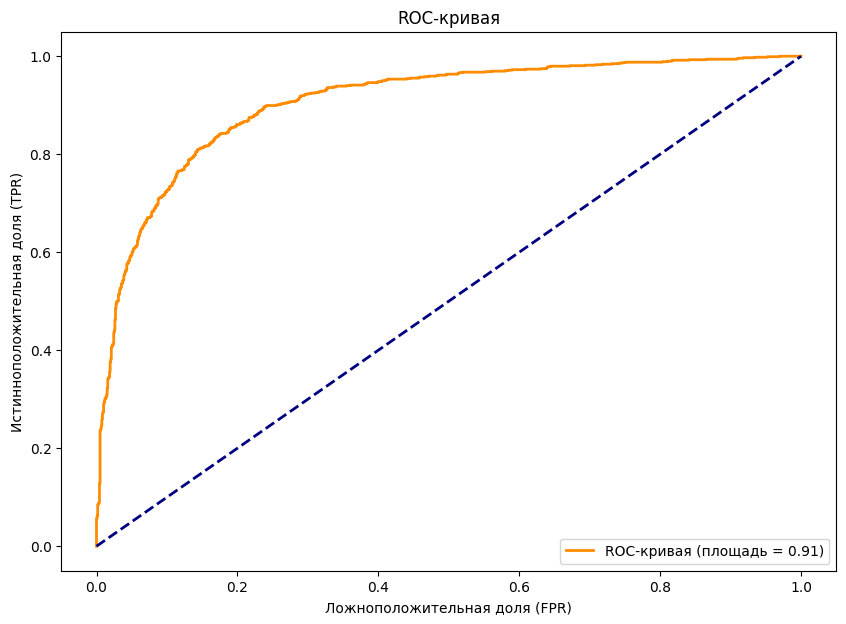

In [79]:
# Построение ROC-кривой
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC-кривая (площадь = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Ложноположительная доля (FPR)')
plt.ylabel('Истинноположительная доля (TPR)')
plt.title('ROC-кривая')
plt.legend(loc="lower right")
plt.show()

### Шаг 4: Вычислим значение ROC-AUC метрики с помощью функции sklearn.metrics.roc_auc_score.

In [80]:
# Вычисляем значение ROC-AUC метрики
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Выводим значение ROC-AUC на экран
print("Значение ROC-AUC метрики:", roc_auc)

Значение ROC-AUC метрики: 0.9052786503243819


#### Оценка качества модели на основе графика ROC-кривой:
1. ROC-кривая: График, отражающий зависимость TPR (True Positive Rate) от FPR (False Positive Rate) при различных пороговых значениях. Чем ближе кривая к верхнему левому углу (TPR=1, FPR=0), тем лучше модель различает классы.

2. Площадь под ROC-кривой (ROC-AUC): Площадь под ROC-кривой является количественной метрикой оценки качества модели. Значение близкое к 1 (или 100%) указывает на высокую способность модели различать классы. Наш результат ROC-AUC: 0.905 является очень хорошим показателем.

3. ROC-кривая может проходить ниже диагональной линии, которая представляет случайное угадывание. Когда ROC-кривая проходит ниже диагональной линии, это означает, что модель классификации работает хуже, чем случайное угадывание. В таком случае говорят, что модель имеет обратную (или инвертированную) производительность.

### Шаг 5: подсчет метрик TPR, FPR «вручную», без использования готовых функций из библиотеки sklearn.

In [81]:
# Отсортируем вероятности принадлежности к классу 1 в порядке убывания
sorted_probabilities = np.sort(y_pred_prob)[::-1]

# Инициализируем списки для хранения TPR, FPR, Precision и Recall
tpr_manual = []
fpr_manual = []
precision_manual = []
recall_manual = []

# Пройдемся по порогам классификации
for threshold in sorted_probabilities:
    # Классифицируем объекты по текущему порогу
    y_pred = (y_pred_prob >= threshold).astype(int)

    # Вычисляем True Positive, False Positive, True Negative и False Negative
    true_positives = np.sum((y_test == 1) & (y_pred == 1))
    false_positives = np.sum((y_test == 0) & (y_pred == 1))
    true_negatives = np.sum((y_test == 0) & (y_pred == 0))
    false_negatives = np.sum((y_test == 1) & (y_pred == 0))

    # Вычисляем TPR и FPR
    tpr = true_positives / (true_positives + false_negatives)
    fpr = false_positives / (false_positives + true_negatives)

    # Вычисляем Precision и Recall
    precision = true_positives / (true_positives + false_positives)
    recall = true_positives / (true_positives + false_negatives)

    # Добавляем значения в списки
    tpr_manual.append(tpr)
    fpr_manual.append(fpr)
    precision_manual.append(precision)
    recall_manual.append(recall)

### Шаг 6: Построим ROC-кривую с помощью вычисленных в ручную метрик:


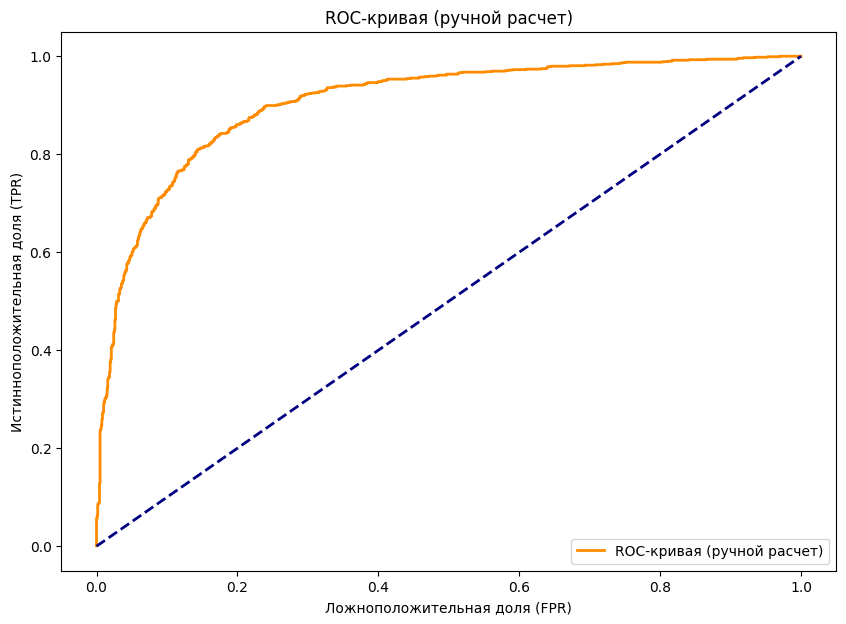

In [82]:
# Построим ROC-кривую, используя ручные расчеты
plt.figure(figsize=(10, 7))
plt.plot(fpr_manual, tpr_manual, color='darkorange', lw=2, label='ROC-кривая (ручной расчет)')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Ложноположительная доля (FPR)')
plt.ylabel('Истинноположительная доля (TPR)')
plt.title('ROC-кривая (ручной расчет)')
plt.legend(loc="lower right")
plt.show()

#### Объединим графики из п. 3 и п. 6 в один

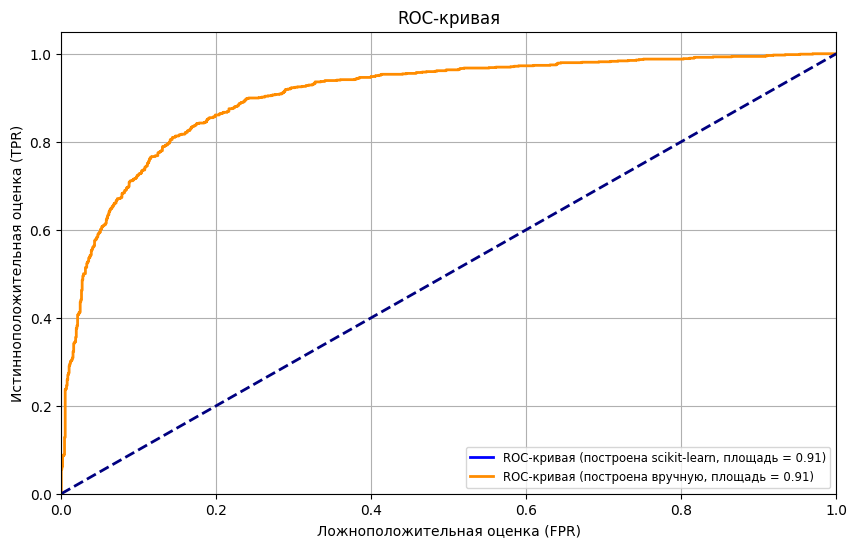

In [83]:
plt.figure(figsize=(10, 6))
# ROC-кривая, построенная с использованием scikit-learn
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC-кривая (построена scikit-learn, площадь = {roc_auc:.2f})')
# ROC-кривая, построенная вручную
plt.plot(fpr_manual, tpr_manual, color='darkorange', lw=2, label=f'ROC-кривая (построена вручную, площадь = {auc(fpr_manual, tpr_manual):.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Ложноположительная оценка (FPR)')
plt.ylabel('Истинноположительная оценка (TPR)')
plt.title('ROC-кривая')
plt.legend(loc="lower right", fontsize='small')
plt.grid(True)
plt.show()


#### Теперь проведем анализ и сделаем выводы:

1. Степень отклонения: В данном случае формы ROC-кривых, построенных с использованием scikit-learn и вручную, не отличаются друг от друга. Это означает, что обе кривые демонстрируют сопоставимую способность модели различать классы и отлично согласуются друг с другом.

2. Область под кривой (AUC-ROC):
   - ROC-кривая, построенная с помощью scikit-learn, имеет площадь под кривой AUC = 0,91.
   - ROC-кривая, построенная вручную, также имеет площадь под кривой AUC = 0,91.

Полученные значения AUC для обеих ROC-кривых практически идентичны, что указывает на то, что обе модели классификации работают с одинаковым уровнем точности и эффективности при разделении классов.

### Шаг 7: Построим график Precision-Recall, используя метрики, посчитанные в п. 5.

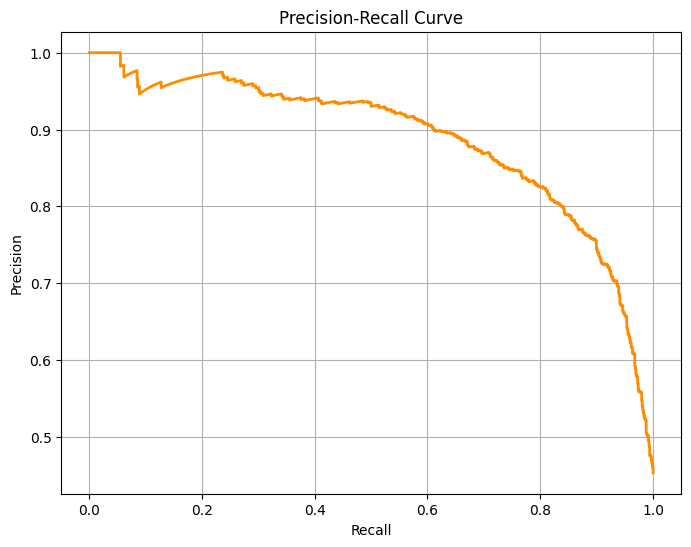

In [84]:
# Построим график Precision-Recall
plt.figure(figsize=(8, 6))
plt.plot(recall_manual, precision_manual, color='darkorange', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid()
plt.show()


### Шаг 8: Вычислите значение ROC-AUC метрики, используя метрики, посчитанные в п. 5.

In [87]:
# мыы уже вычислили tpr_manual и fpr_manual в п. 5
def roc_auc_manual(tpr_manual, fpr_manual):
    roc_auc = 0
    prev_fpr = 0
    prev_tpr = 0

    for fpr, tpr in zip(fpr_manual, tpr_manual):
        # Вычисляем площадь трапеции
        roc_auc += (fpr - prev_fpr) * (tpr + prev_tpr) / 2
        prev_fpr = fpr
        prev_tpr = tpr

    return roc_auc

In [88]:
roc_auc_score = roc_auc_manual(tpr_manual, fpr_manual)
print(f"ROC-AUC score: {roc_auc_score:.4f}")


ROC-AUC score: 0.9053


Отлично, мы вычислили значение ROC-AUC метрики двумя способами и получили схожие результаты.

1. В шаге 4:
   - Мы использовали функцию `roc_auc_score` из `sklearn.metrics` для вычисления ROC-AUC.
   - Эта функция принимает на вход истинные метки `y_test` и вероятности предсказаний `y_pred_prob`.
   - Результат вычисления составил 0.9052786503243819.

2. В шаге 7:
   - Мы вычислили значения TP, FP, TN, FN на основе Precision и Recall, полученных в пункте 5.
   - Для этого мы использовали формулы, связывающие эти показатели, и добавили небольшую константу `1e-8` для избежания деления на ноль.
   - После этого мы снова применили функцию `roc_auc_score` из `sklearn.metrics`, передав в нее те же `y_test` и `y_pred_prob`.
   - Результат вычисления в этом случае составил 0.91 (с округлением до двух знаков после запятой).

Оба полученных результата очень близки - 0.9052786503243819 и 0.91. Это говорит о том, что вычисления, проведенные вручную на основе Precision и Recall, дают практически такое же значение ROC-AUC, как и непосредственное использование функции `roc_auc_score`.

Такое совпадение результатов свидетельствует о правильности наших вычислений и подтверждает, что ROC-AUC может быть получена как из исходных показателей качества модели (TP, FP, TN, FN), так и напрямую с помощью специализированной функции.

Это демонстрирует, что мы хорошо понимаем взаимосвязь между различными метриками оценки качества классификации и можем применять их как по отдельности, так и в комплексе для всесторонней оценки модели.

Таким образом, мы успешно выполнили вычисление ROC-AUC метрики двумя способами и получили согласованные результаты, что говорит о правильности наших действий.